In [1]:
library('tidyverse')
library('scales')

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0      ✔ purrr   0.3.5 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘scales’


The following object is masked from ‘package:purrr’:

    discard


The following object is masked from ‘package:readr’:

    col_factor




In [2]:
spotifysongs_df = read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-01-21/spotify_songs.csv', 
                           col_types = cols())

In [3]:
spotifysongs_df |> head()

track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,⋯,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxury Remix,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury Remix],2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,⋯,6,-2.634,1,0.0583,0.1020,0.00e+00,0.0653,0.518,122.036,194754
0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,⋯,11,-4.969,1,0.0373,0.0724,4.21e-03,0.3570,0.693,99.972,162600
1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,⋯,1,-3.432,0,0.0742,0.0794,2.33e-05,0.1100,0.613,124.008,176616
75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,⋯,7,-3.778,1,0.1020,0.0287,9.43e-06,0.2040,0.277,121.956,169093
1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,⋯,1,-4.672,1,0.0359,0.0803,0.00e+00,0.0833,0.725,123.976,189052
7fvUMiyapMsRRxr07cU8Ef,Beautiful People (feat. Khalid) - Jack Wins Remix,Ed Sheeran,67,2yiy9cd2QktrNvWC2EUi0k,Beautiful People (feat. Khalid) [Jack Wins Remix],2019-07-11,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,⋯,8,-5.385,1,0.1270,0.0799,0.00e+00,0.1430,0.585,124.982,163049


In [4]:
spotifysongs_df2 = spotifysongs_df |>
    group_by(playlist_genre) |> 
    mutate(num_songs = n()) |>
    ungroup() |>
    arrange(num_songs) |>
    mutate(playlist_genre = fct_inorder(playlist_genre))

In [5]:
spotifysongs_df2 |> pull(playlist_genre) |> levels()

[1] "rock"  "latin" "r&b"   "pop"   "rap"   "edm"

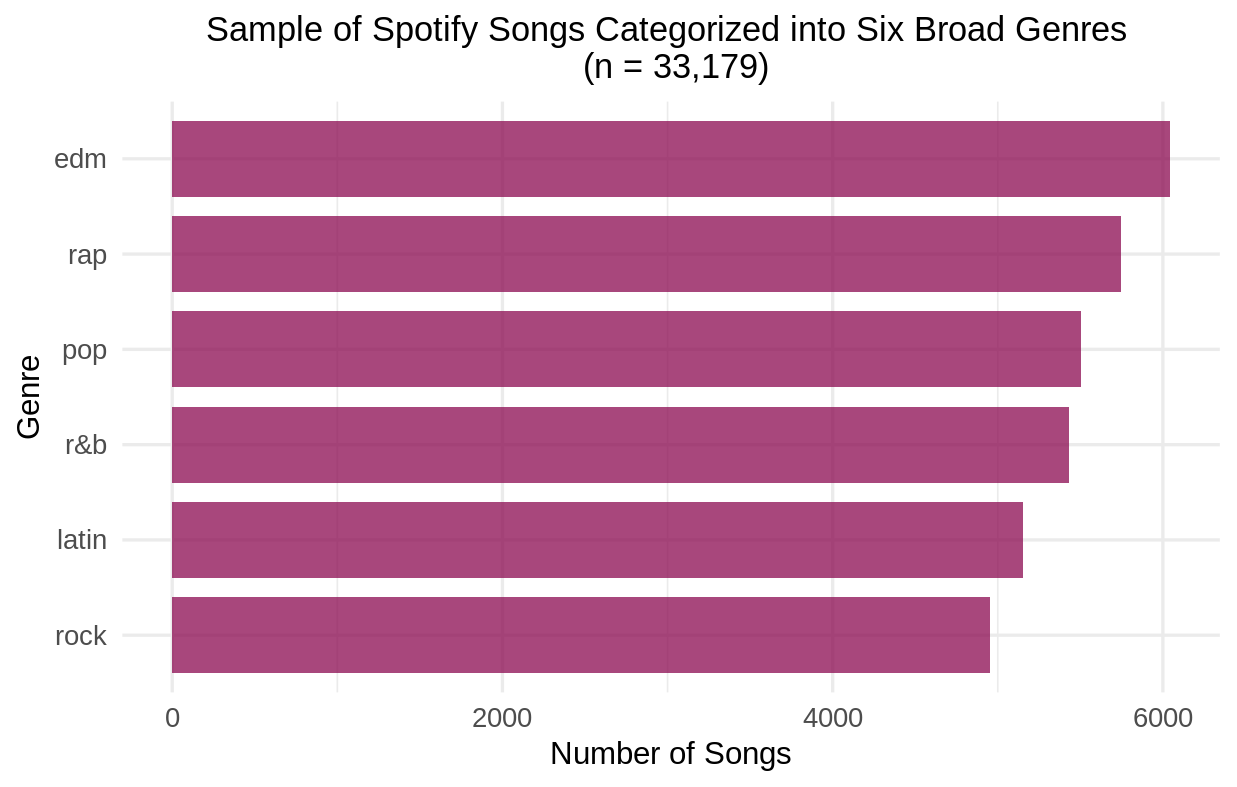

In [31]:
options(repr.plot.width = 5.5, repr.plot.height = 3.5, repr.plot.res = 225)

p = ggplot(spotifysongs_df2, aes(y = playlist_genre)) + 
    geom_bar(width = .8, fill = 'deeppink4', alpha = 0.75) +
    theme_minimal() +
    labs(x = 'Number of Songs', 
         y = 'Genre',
        title = 'Sample of Spotify Songs Categorized into Six Broad Genres \n (n = 33,179)') +
    theme(
        plot.title = element_text(size = 11, hjust = 0.5),
        axis.title.y = element_text(size = 10),
        axis.title.x = element_text(size = 10))
          

p

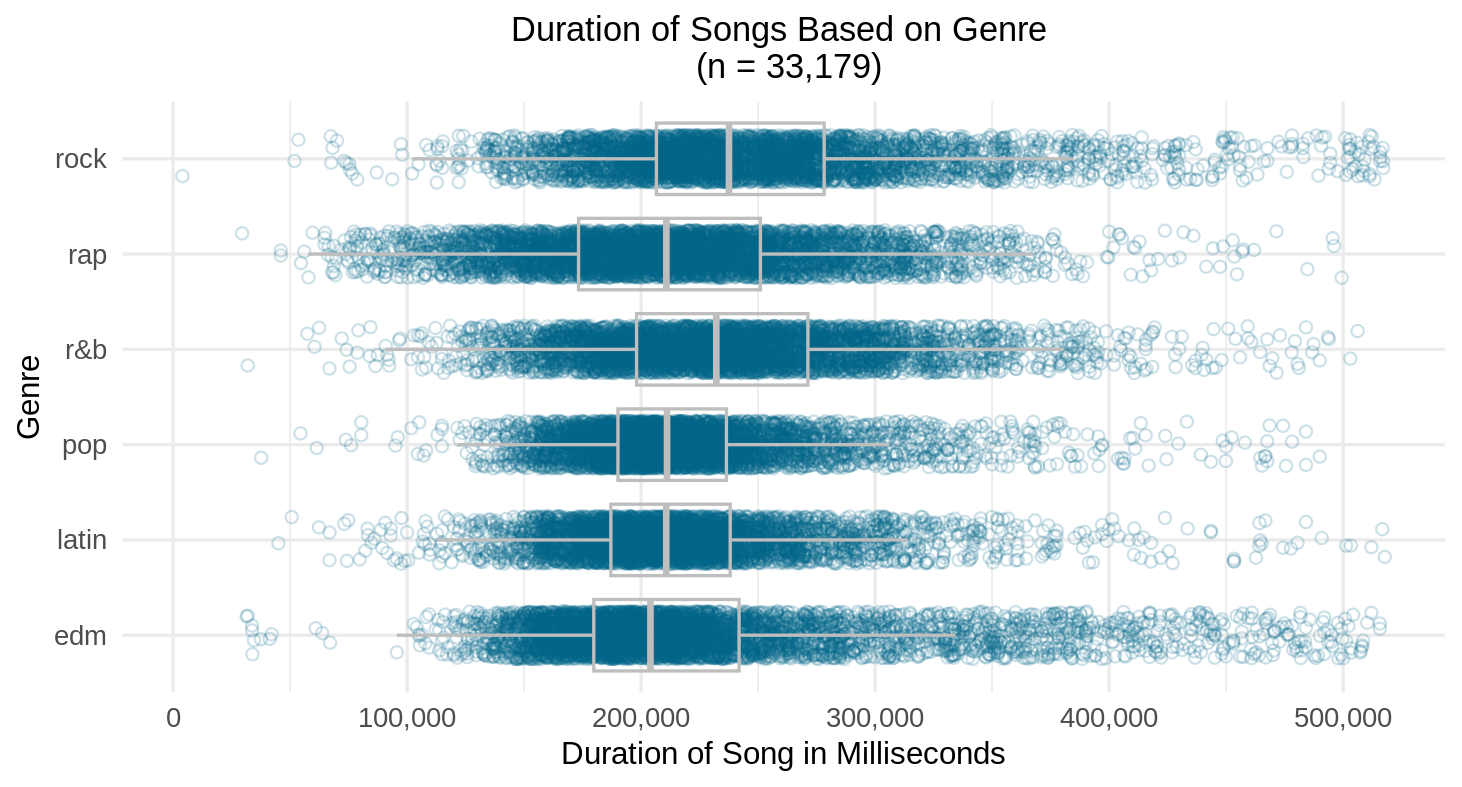

In [30]:
options(repr.plot.width = 6.5, repr.plot.height = 3.5, repr.plot.res = 225)

p = ggplot(spotifysongs_df, aes(x = duration_ms, y = playlist_genre)) +
    geom_point(position = position_jitter(h = 0.25), size = 1.5, alpha = 0.2, color = 'deepskyblue4', shape = 21) +
    geom_boxplot(outlier.alpha = 0, alpha = 0, color = 'grey') +
    scale_x_continuous(labels = comma) +
    theme_minimal() +
    labs(x = 'Duration of Song in Milliseconds', 
         y = 'Genre',
        title = 'Duration of Songs Based on Genre \n (n = 33,179)') +
    theme(
        plot.title = element_text(size = 11, hjust = 0.5),
        axis.title.y = element_text(size = 10),
        axis.title.x = element_text(size = 10))

p


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


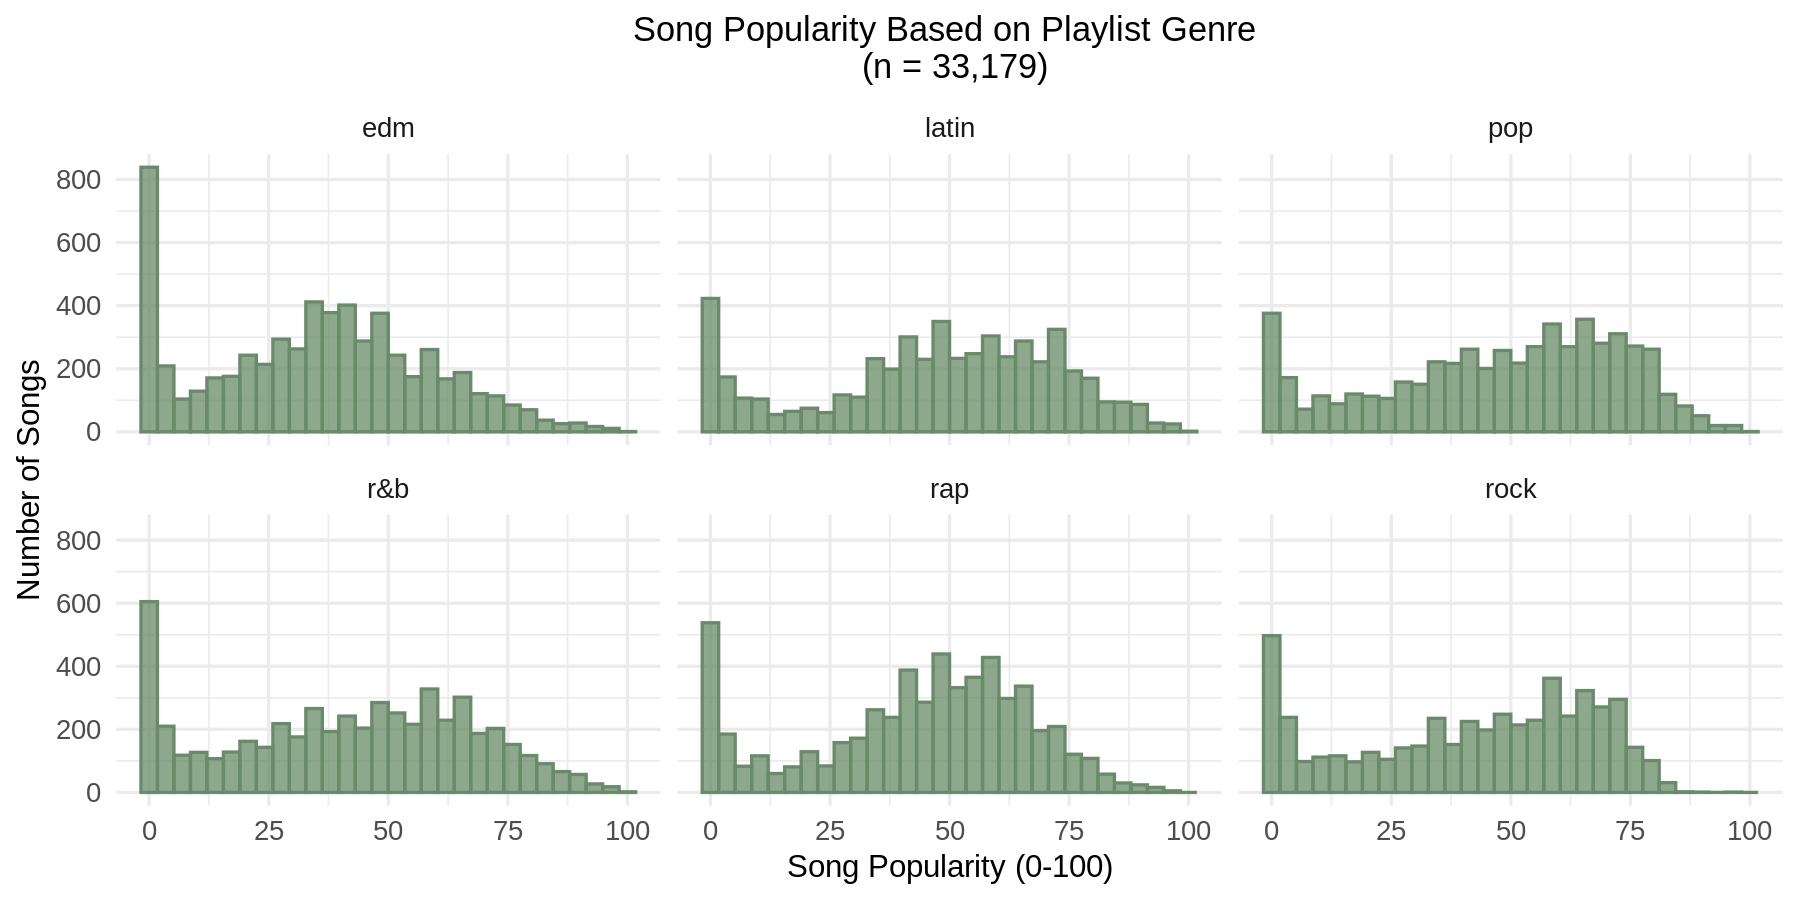

In [29]:
options(repr.plot.width = 8, repr.plot.height = 4, repr.plot.res = 225)

p = ggplot(spotifysongs_df, aes(x = track_popularity)) + 
    geom_histogram(color = 'darkseagreen4', fill = 'darkseagreen4', alpha = 0.75) +
    facet_wrap(~playlist_genre) +
    theme_minimal() +
    labs(x = 'Song Popularity (0-100)', 
         y = 'Number of Songs',
        title = 'Song Popularity Based on Playlist Genre \n (n = 33,179)') +
    theme(
        plot.title = element_text(size = 11, hjust = 0.5),
        axis.title.y = element_text(size = 10),
        axis.title.x = element_text(size = 10))
        
p

This data set was found on the Tidy Tuesday repo, and it examines a sample of 33,179 songs from Spotify that were classified into six broad genre catergories including EDM, Latin, Pop, R&B, RAP, and Rock. Each song was placed into the genre that described it best based on specific audio features (e.g., instrumentalness, danceability, tempo, etc.) that Spotify tracks. The above visualizations examine this sample of songs based on the six broad genre catergories.

The first visualization is a bar chart that simply looks at how many songs were classified into each genre. There is a similar number of songs in each genre, with EDM having the most (i.e., 6028) and rock having the least (i.e., 5098 songs). The second visualization looks at the duration of each song based on genre, showing R&B and Rock songs tend to be longer, while EDM songs tend to be shorter. The last visualization looks at song popularity based on genre where each song was given a number from 0-100; a higher number indicates more popularity. While all genres have several songs catorgized as 0 or not very popular, EDM appears to have the largest amount of songs at 0. Additionally, Pop appears to be slightly left skewed which may indicate that songs in this genre are more popular.